<a href="https://colab.research.google.com/github/sarasabino/Accident_Rate_Project/blob/main/Src/Notebooks/03_Correlation_analysis_%26_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/Total_staff_by_employee.csv .


## STAFF DATASET - Feature description:

- **Codigo accidentado** : Code used only for those who had have an accident to be able to indentify the accident's reference
- **Turno**: working turn of the employee in general terms, it can be morning, evening or night
- **Gender**: employees' gender
- **Planta** plant where the employee works
- **Tipo accidente**: these is the type of accident, it can be an inccident or an accident with or without leave
- **Tipo trabajador** type of employee depending on their contract
- **Fabrica** fabric
- **Tecnología** fabric type of technology
- **Pais** :  country
- **Horas Presencia Efectiva Subcontratados**,real worked hours of subcontracted employees
- **Horas Presencia Efectiva ETTs**, real worked hours of ETT (temporal) employees
- **Horas Formacion Seguridad Propios**, Trainning hours of undefined employees
- **Horas Formacion Seguridad ETTs**, Trainning hours of ETTs
- **Accident**, accident, this column is bool Yes/No
- **wk_position**, work position of the employee
- **Age**, it could be <30 years, 30-50, >50 years
- **Severity**, severity of the accident, low, medium, severe etc
- **Accident_place** , place where the accident occurred


In [2]:
import pandas as pd

staff = pd.read_csv('Total_staff_by_employee.csv', sep=';')
staff.head()

,Unnamed: 0,Codigo accidentado,Turno,Gender,Planta,Tipo accidente,Tipo trabajador,Fabrica,Tecnología,Pais,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,Accident,wk_position,Age,Severity,Accident_place
0,0,HS-CHGQ_6253,Turno de mañana,Hombre,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,Yes,Programador,Entre 30-50,Leve,Mantenimiento
1,1,HS-CHGQ_6813,Turno de mañana,Hombre,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,Yes,Gruista y limpieza de caldera,Mayor 50,Muy grave,Mantenimiento
2,2,HS-CHGQ_6814,Turno de mañana,Hombre,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,Yes,Gruista ácido,Entre 30-50,Muy grave,Mantenimiento
3,3,HS-CHGQ_6138,Turno de mañana,Hombre,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,Yes,Montacarguista (en entrenamiento),Entre 30-50,Grave,Mantenimiento
4,4,HS-CHGQ_6139,Turno de tarde,Hombre,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,Yes,Gruista y limpieza de caldera,Entre 30-50,Grave,Mantenimiento


In [3]:
y = pd.get_dummies(staff.Gender, prefix='Gender')
print(y)

       Gender_Hombre  Gender_Mujer
0                  1             0
1                  1             0
2                  1             0
3                  1             0
4                  1             0
...              ...           ...
21205              1             0
21206              1             0
21207              1             0
21208              1             0
21209              1             0

[21210 rows x 2 columns]


In [4]:
staff['Gender_Hombre'] =y['Gender_Hombre']

staff.drop(columns={'Gender','Unnamed: 0'}, inplace=True)

In [5]:
y = pd.get_dummies(staff.Turno, prefix='T')
print(y)

       T_Turno de mañana  T_Turno de noche  T_Turno de tarde
0                      1                 0                 0
1                      1                 0                 0
2                      1                 0                 0
3                      1                 0                 0
4                      0                 0                 1
...                  ...               ...               ...
21205                  1                 0                 0
21206                  0                 1                 0
21207                  0                 0                 1
21208                  0                 1                 0
21209                  1                 0                 0

[21210 rows x 3 columns]


In [6]:
staff['T_Turno de mañana'] =y['T_Turno de mañana']
staff['T_Turno de noche'] =y['T_Turno de noche']

staff['T_Turno de tarde'] =y['T_Turno de tarde']


In [7]:
y = pd.get_dummies(staff.Age, prefix='Age')
print(y)

       Age_Entre 30-50  Age_Mayor 50  Age_Menor 30
0                    1             0             0
1                    0             1             0
2                    1             0             0
3                    1             0             0
4                    1             0             0
...                ...           ...           ...
21205                0             0             1
21206                0             1             0
21207                1             0             0
21208                0             1             0
21209                0             1             0

[21210 rows x 3 columns]


In [8]:
staff['Age_Entre 30-50'] =y['Age_Entre 30-50']
staff['Age_Mayor 50'] =y['Age_Mayor 50']

staff['Age_Menor 30'] =y['Age_Menor 30']

In [9]:
y = pd.get_dummies(staff.Accident, prefix='Acc')
y

,Acc_No,Acc_Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
21205,1,0
21206,1,0
21207,1,0
21208,1,0


In [10]:
staff['Accident'] = y['Acc_Yes']

We are going to merge some categories of type of worker to one-hot encode them

In [11]:
staff['Tipo trabajador'].unique()

array(['Incidente (no aplica)', 'ETT', 'Indefinido', 'Subcontratado',
       'Duración Determinada', 'Prácticas', 'Cedidos de otras plantas',
       'No aplica', 'Indefinido con preaviso'], dtype=object)

In [12]:
def reduce_typew(i):
  if i in ['Indefinido', 'Indefinido con preaviso']:
    return 'Indefinido'
  elif i in ['No aplica', 'Cedidos de otras plantas','Incidente (no aplica)', 'Subcontratado', 'Prácticas']:
    return 'Otros'
  else:
    return i

In [13]:
staff['Tipo_trab_reduced'] = staff['Tipo trabajador'].apply(reduce_typew)

In [14]:
y = pd.get_dummies(staff['Tipo_trab_reduced'], prefix='Acc')
y

,Acc_Duración Determinada,Acc_ETT,Acc_Indefinido,Acc_Otros
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
21205,0,1,0,0
21206,0,0,0,1
21207,0,0,0,1
21208,0,0,1,0


In [15]:
staff['Acc_Duración Determinada'] = y['Acc_Duración Determinada']
staff['Acc_ETT'] = y['Acc_ETT']
staff['Acc_Indefinido'] = y['Acc_Indefinido']
staff['Acc_Otros'] = y['Acc_Otros']

In [16]:
staff['Horas Presencia Efectiva Subcontratados'] = staff['Horas Presencia Efectiva Subcontratados'].fillna(0)
staff['Horas Presencia Efectiva ETTs'] = staff['Horas Presencia Efectiva ETTs'].fillna(0)
staff['Horas Formacion Seguridad Propios'] = staff['Horas Formacion Seguridad Propios'].fillna(0)
staff['Horas Formacion Seguridad ETTs	'] = staff['Horas Formacion Seguridad ETTs'].fillna(0)


In [17]:
staff.head(5)

,Codigo accidentado,Turno,Planta,Tipo accidente,Tipo trabajador,Fabrica,Tecnología,Pais,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,Accident,wk_position,Age,Severity,Accident_place,Gender_Hombre,T_Turno de mañana,T_Turno de noche,T_Turno de tarde,Age_Entre 30-50,Age_Mayor 50,Age_Menor 30,Tipo_trab_reduced,Acc_Duración Determinada,Acc_ETT,Acc_Indefinido,Acc_Otros,Horas Formacion Seguridad ETTs\t
0,HS-CHGQ_6253,Turno de mañana,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,1,Programador,Entre 30-50,Leve,Mantenimiento,1,1,0,0,1,0,0,Otros,0,0,0,1,0.0
1,HS-CHGQ_6813,Turno de mañana,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,1,Gruista y limpieza de caldera,Mayor 50,Muy grave,Mantenimiento,1,1,0,0,0,1,0,Otros,0,0,0,1,0.0
2,HS-CHGQ_6814,Turno de mañana,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,1,Gruista ácido,Entre 30-50,Muy grave,Mantenimiento,1,1,0,0,1,0,0,Otros,0,0,0,1,0.0
3,HS-CHGQ_6138,Turno de mañana,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,1,Montacarguista (en entrenamiento),Entre 30-50,Grave,Mantenimiento,1,1,0,0,1,0,0,Otros,0,0,0,1,0.0
4,HS-CHGQ_6139,Turno de tarde,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,1,Gruista y limpieza de caldera,Entre 30-50,Grave,Mantenimiento,1,0,0,1,1,0,0,Otros,0,0,0,1,0.0


## Feature filter by correlation: the Correlation matrix

 Although we can crate a big correlation matrix to see all feature in general we are going to be creating reduced ones in order to analyze better the features and raise a conclusion. Below we can see the big correlation matrix with all features




In [18]:
staff.head()

,Codigo accidentado,Turno,Planta,Tipo accidente,Tipo trabajador,Fabrica,Tecnología,Pais,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,Accident,wk_position,Age,Severity,Accident_place,Gender_Hombre,T_Turno de mañana,T_Turno de noche,T_Turno de tarde,Age_Entre 30-50,Age_Mayor 50,Age_Menor 30,Tipo_trab_reduced,Acc_Duración Determinada,Acc_ETT,Acc_Indefinido,Acc_Otros,Horas Formacion Seguridad ETTs\t
0,HS-CHGQ_6253,Turno de mañana,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,1,Programador,Entre 30-50,Leve,Mantenimiento,1,1,0,0,1,0,0,Otros,0,0,0,1,0.0
1,HS-CHGQ_6813,Turno de mañana,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,1,Gruista y limpieza de caldera,Mayor 50,Muy grave,Mantenimiento,1,1,0,0,0,1,0,Otros,0,0,0,1,0.0
2,HS-CHGQ_6814,Turno de mañana,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,1,Gruista ácido,Entre 30-50,Muy grave,Mantenimiento,1,1,0,0,1,0,0,Otros,0,0,0,1,0.0
3,HS-CHGQ_6138,Turno de mañana,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,1,Montacarguista (en entrenamiento),Entre 30-50,Grave,Mantenimiento,1,1,0,0,1,0,0,Otros,0,0,0,1,0.0
4,HS-CHGQ_6139,Turno de tarde,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,1,Gruista y limpieza de caldera,Entre 30-50,Grave,Mantenimiento,1,0,0,1,1,0,0,Otros,0,0,0,1,0.0


Our dependent feature will be the "Accident" column and all columns below are the independent features are shown:

In [19]:
staff_matrix = staff[['Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs', 'Accident', 'wk_position', 'Age',
       'Severity', 'Accident_place', 'Gender_Hombre', 'T_Turno de mañana',
       'T_Turno de noche', 'T_Turno de tarde', 'Age_Entre 30-50',
       'Age_Mayor 50', 'Age_Menor 30',
       'Tipo_trab_reduced', 'Acc_Duración Determinada', 'Acc_ETT',
       'Acc_Indefinido', 'Acc_Otros']]

#### We are going to save the encoded data to use in our modelling

In [20]:
from google.colab import files

staff_matrix.to_csv('staff_encoded.csv', sep=';')
files.download("staff_encoded.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

If we look at the correlation map below, we can see the more correlation we have is between the hours features, we could drop some of them in the trainings in order to have less features. 

As we can see the hours of trainning and working hours of ETTs are strongly corelated in a 0.89 so we can drop one of them. For the other features we dont have so high correlations so we will just leave them and try with the modelling part.

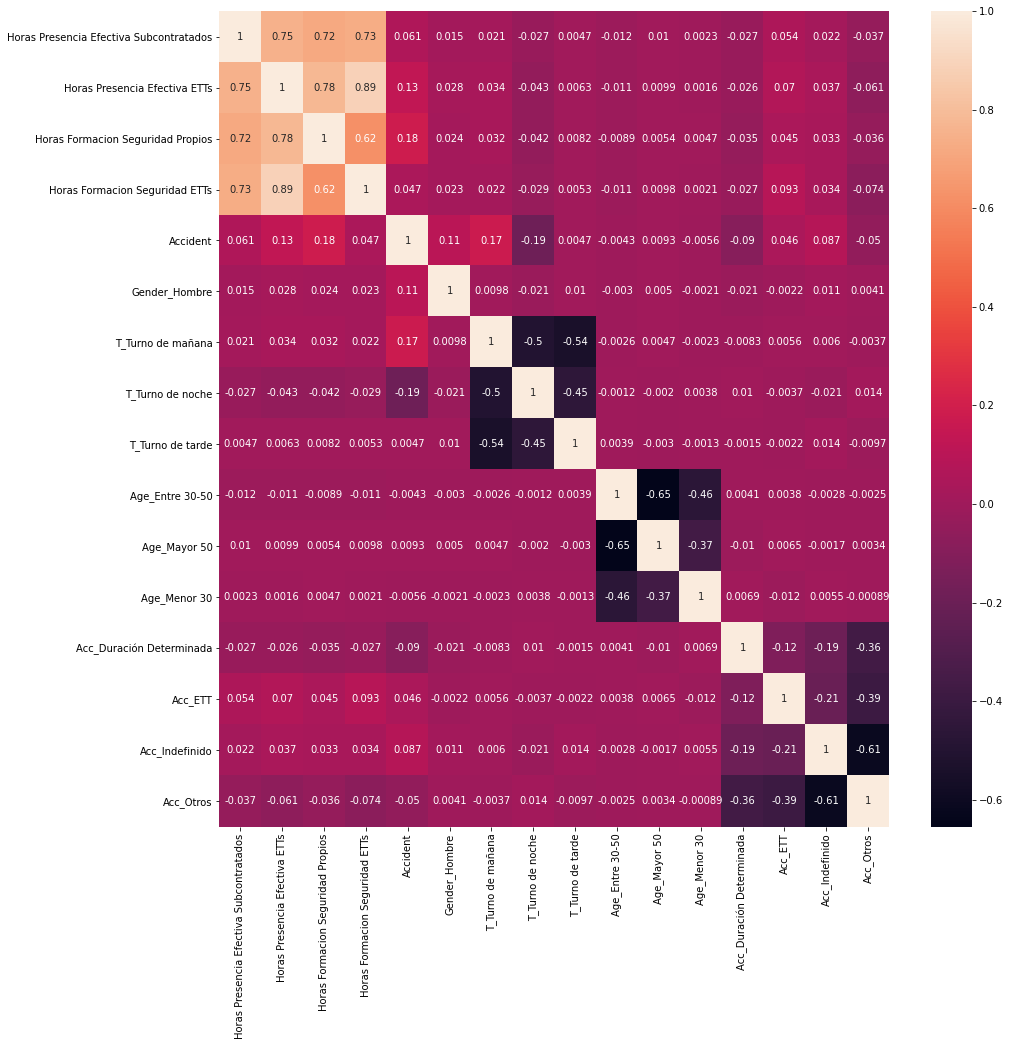

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15)) 

correlation_mat = staff_matrix.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [22]:
age_gender = staff[['Age_Entre 30-50','Age_Mayor 50', 'Age_Menor 30','Gender_Hombre', 'Accident']]

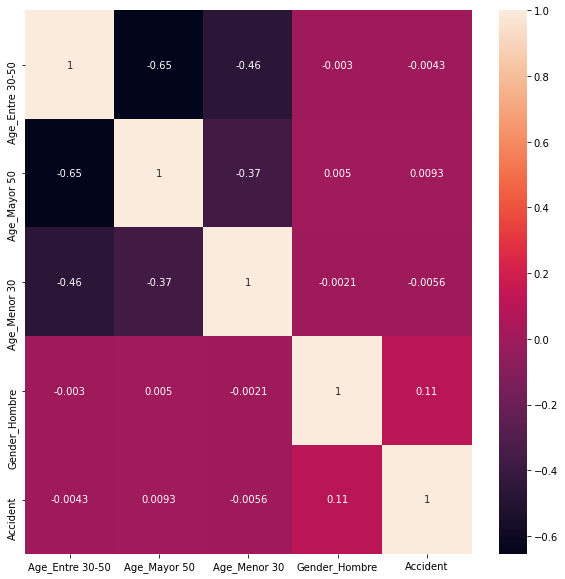

In [23]:
fig, ax = plt.subplots(figsize=(10,10)) 

correlation_mat = age_gender.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

Type of worker and trainning hours

In [24]:
type_hour = staff[['Acc_Duración Determinada', 'Acc_ETT',
       'Acc_Indefinido', 'Acc_Otros','Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs', 'Accident']]

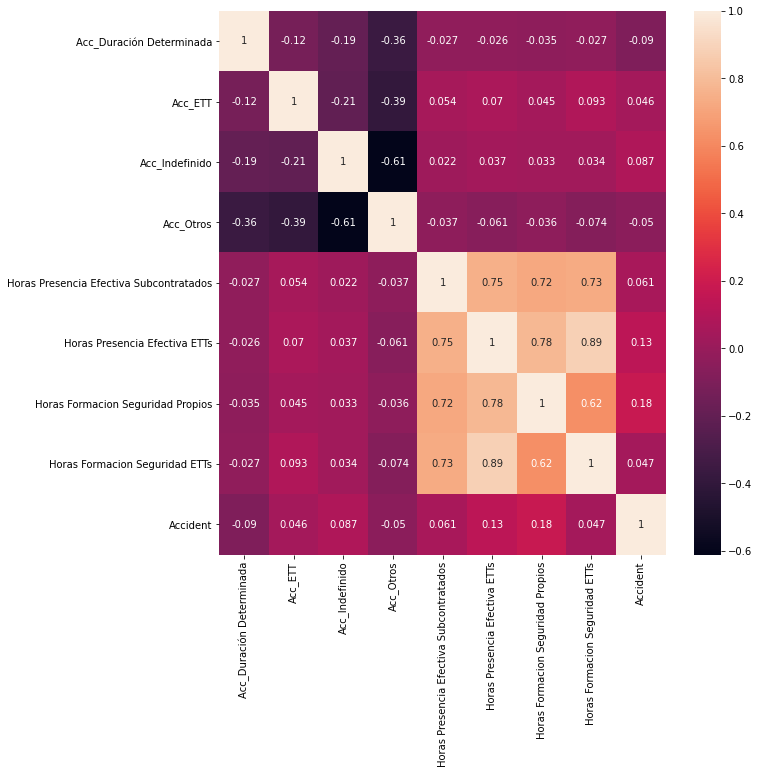

In [25]:
fig, ax = plt.subplots(figsize=(10,10)) 

correlation_mat = type_hour.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

## Data distribution



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


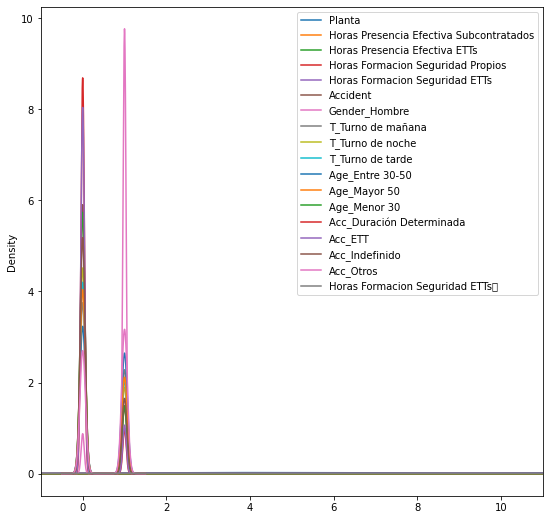

In [26]:
staff.plot(kind='density', figsize = (9,9), xlim=(-1, 11))

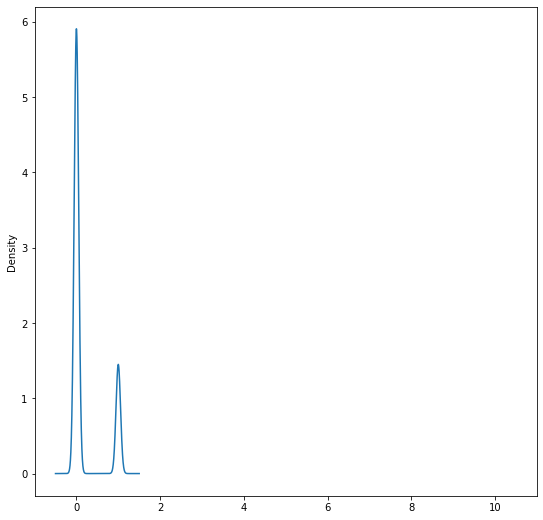

In [27]:
staff['Accident'].plot(kind='density', figsize = (9,9), xlim=(-1, 11))

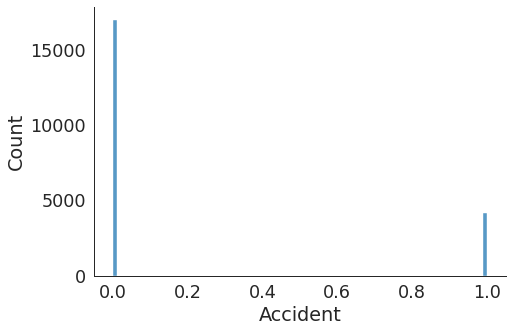

In [28]:
import seaborn as sns

sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=staff, x="Accident", kind="hist", bins = 100, aspect=1.5)

In [29]:
accidents = staff.groupby('Pais').agg('sum').reset_index()
accidents = accidents[['Pais', 'Accident']]
accidents

,Pais,Accident
0,Argentina,915.0
1,Brasil,432.0
2,China,173.0
3,EEUU,383.0
4,España,2243.0
5,Rep.Checa,30.0
6,Russia,4.0


In [30]:
employees = staff.groupby('Pais').agg('count').reset_index()
employees = employees[['Pais', 'Accident']]
employees.rename(columns={'Accident':'Employees'}, inplace=True)
employees['Accidents'] = accidents['Accident']
employees

,Pais,Employees,Accidents
0,Argentina,1780,915.0
1,Brasil,1344,432.0
2,China,1036,173.0
3,EEUU,1769,383.0
4,España,14317,2243.0
5,Rep.Checa,494,30.0
6,Russia,470,4.0


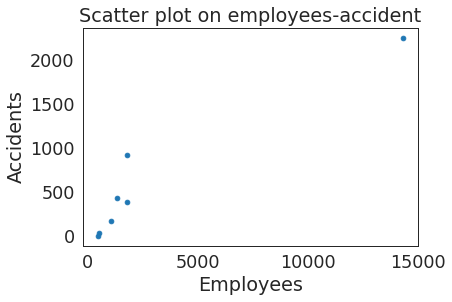

In [31]:
import matplotlib.pyplot as plt

plt.scatter(employees['Employees'], employees['Accidents'])
plt.title('Scatter plot on employees-accident')
plt.xlabel('Employees')
plt.ylabel('Accidents')
plt.show()

In [32]:
!pip install fitter

In [33]:
from fitter import Fitter, get_common_distributions, get_distributions

,sumsquare_error,aic,bic,kl_div
burr,4846.111968,282.014139,-31272.390121,inf
gamma,4878.495357,523.970081,-31141.091280,inf
lognorm,5935.043929,612.911885,-26983.134081,inf
norm,6740.252425,114.070390,-24294.697620,inf
beta,6835.248690,5941.502978,-23977.929071,inf


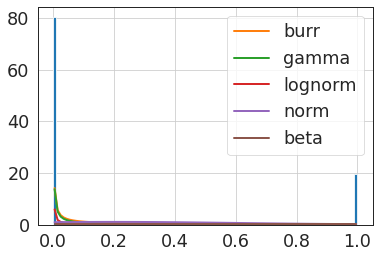

In [34]:


accident = staff['Accident'].values

f = Fitter(accident,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

## Feature filter by variance

If a variable has a variation near to 0 that means that variable doesnt have much change, so it doesnt represent when change happens. 

We will want to discard those variables with poor variance. 

As we can see below all our variables are variable so we dont need to discard any.

In [35]:
staff.var()

Planta                                     3.746593e+02
Horas Presencia Efectiva Subcontratados    1.348860e+08
Horas Presencia Efectiva ETTs              3.177441e+08
Horas Formacion Seguridad Propios          3.747394e+05
Horas Formacion Seguridad ETTs             1.308638e+05
Accident                                   1.582450e-01
Gender_Hombre                              7.550731e-02
T_Turno de mañana                          2.351227e-01
T_Turno de noche                           2.082174e-01
T_Turno de tarde                           2.198907e-01
Age_Entre 30-50                            2.475093e-01
Age_Mayor 50                               2.255975e-01
Age_Menor 30                               1.637308e-01
Acc_Duración Determinada                   9.139683e-02
Acc_ETT                                    1.031869e-01
Acc_Indefinido                             1.832299e-01
Acc_Otros                                  2.484245e-01
Horas Formacion Seguridad ETTs\t           1.101

## Imbalanced classes

We have a dataset with imbalanced classes, we have 17030 rows of "No" class and 4180 of "Yes".

We will need to balance the dataset in order to improve our machine learning algorithms predictions. (*See 'Model_selection*')

As we have a huge dataset and in order to not loss information we are going to use the over sample technique, completing our dataset with accidents that has already occurred in the same circunstances for an employee.

In [36]:
y = staff['Accident']

In [37]:
X = staff.drop(columns={'Accident'})

In [38]:
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
counter = Counter(y)
for k, v in counter.items():
  dist = v / len(y) * 100
  print(f'Class={k}, n={v} ({dist}%)')

Class=1, n=4180 (19.70768505421971%)
Class=0, n=17030 (80.29231494578029%)
